In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

In [82]:
df = pd.read_csv('/content/sample_data/thyroid dataset.csv')

In [83]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [85]:
df.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


In [86]:
df.isnull().sum()

,0
Age,0
Gender,0
Smoking,0
Hx Smoking,0
Hx Radiothreapy,0
Thyroid Function,0
Physical Examination,0
Adenopathy,0
Pathology,0
Focality,0


In [87]:
df['Recurred'].value_counts()

,count
Recurred,
No,275
Yes,108


In [88]:
df['Response'].value_counts()

,count
Response,
Excellent,208
Structural Incomplete,91
Indeterminate,61
Biochemical Incomplete,23


Count Plot on Categorical Variables

In [89]:
cat_features = ['Gender','Thyroid Function','Pathology','Stage','Response','Recurred']

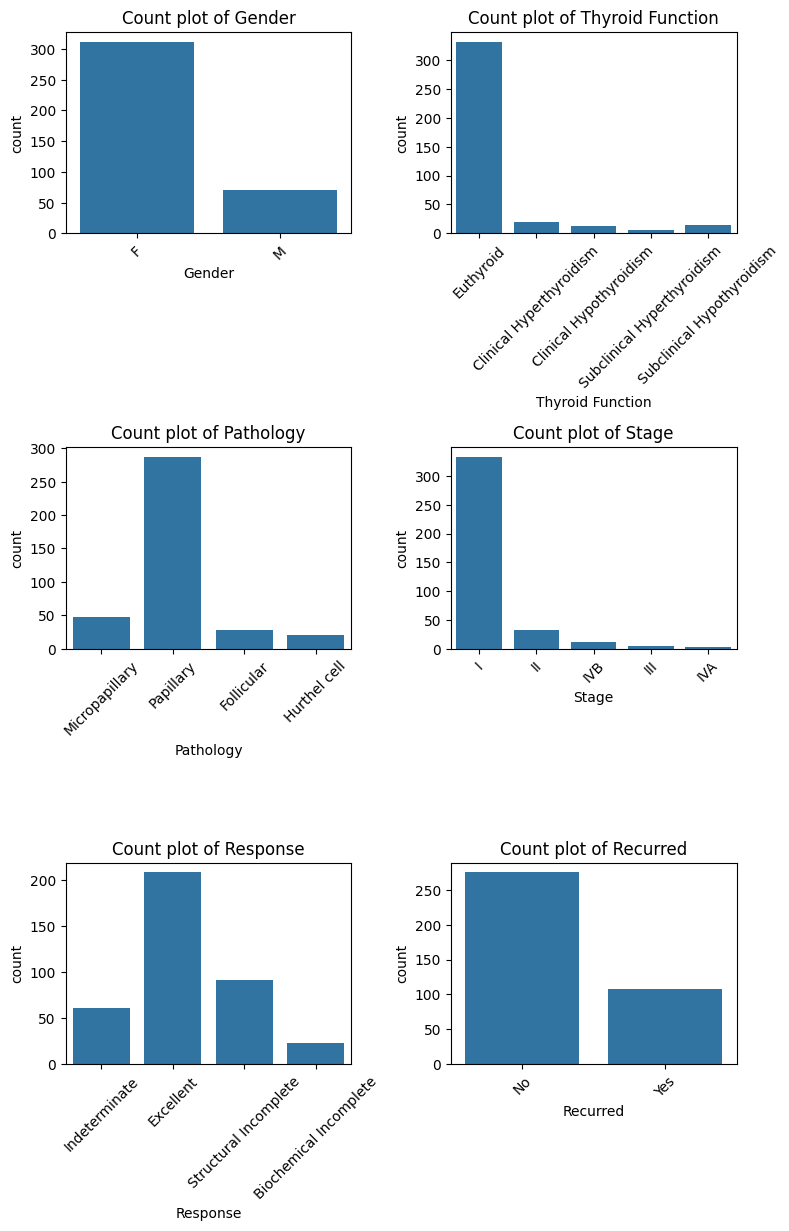

In [90]:
plt.figure(figsize=(8,15))
for i , col in enumerate(cat_features,1):
  plt.subplot(4,2,i)
  sns.countplot(data=df, x=col)
  plt.title(f'Count plot of {col}')
  plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Histogram for Age Column

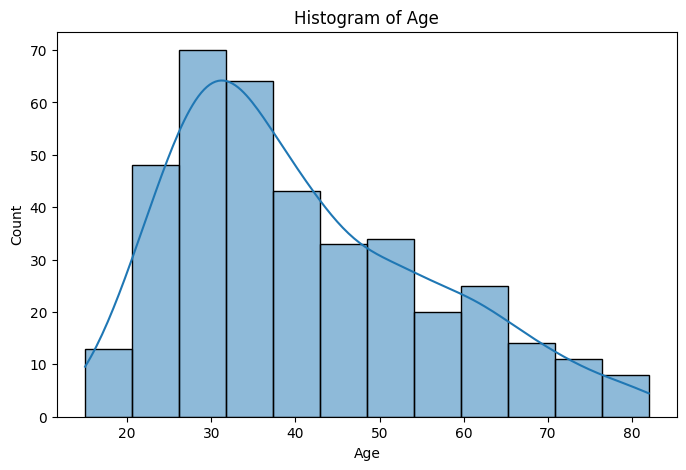

In [91]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Age', kde=True)
plt.title('Histogram of Age')
plt.show()

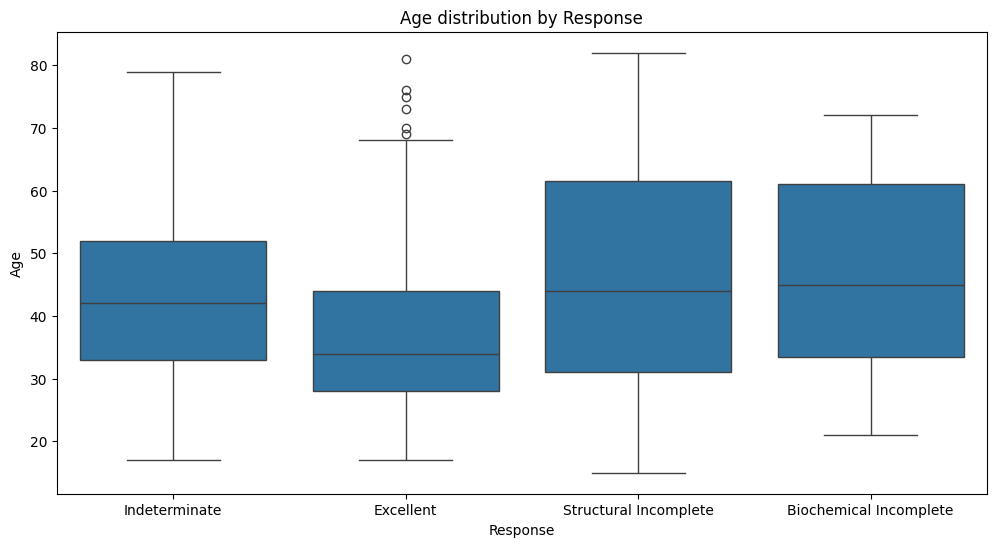

In [92]:
  plt.figure(figsize=(12,6))
  sns.boxplot(data=df, x='Response', y='Age')
  plt.title("Age distribution by Response")
  plt.show()

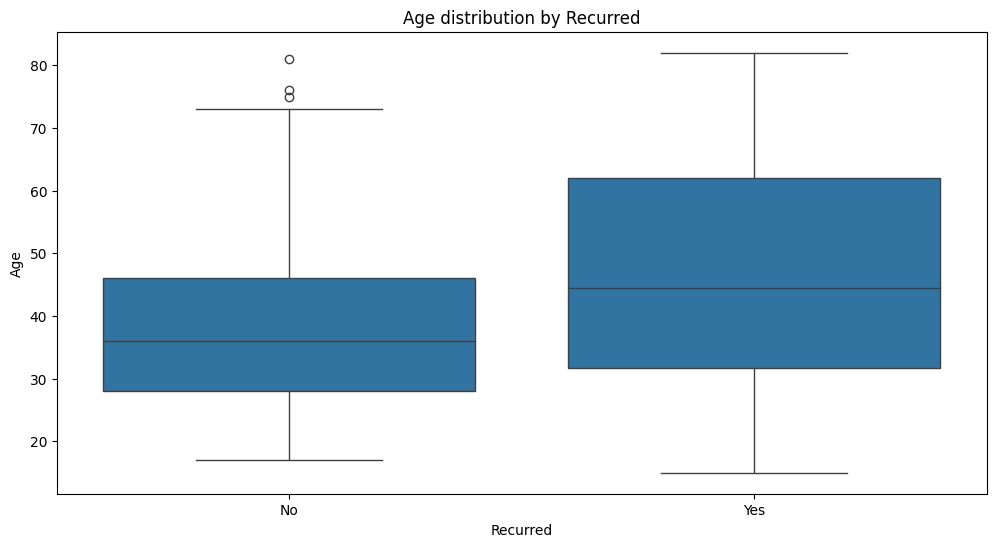

In [93]:
  plt.figure(figsize=(12,6))
  sns.boxplot(data=df, x='Recurred', y='Age')
  plt.title("Age distribution by Recurred")
  plt.show()

In [94]:
pd.crosstab(df['Response'], df['Recurred'])

Recurred,No,Yes
Response,,
Biochemical Incomplete,12,11
Excellent,207,1
Indeterminate,54,7
Structural Incomplete,2,89


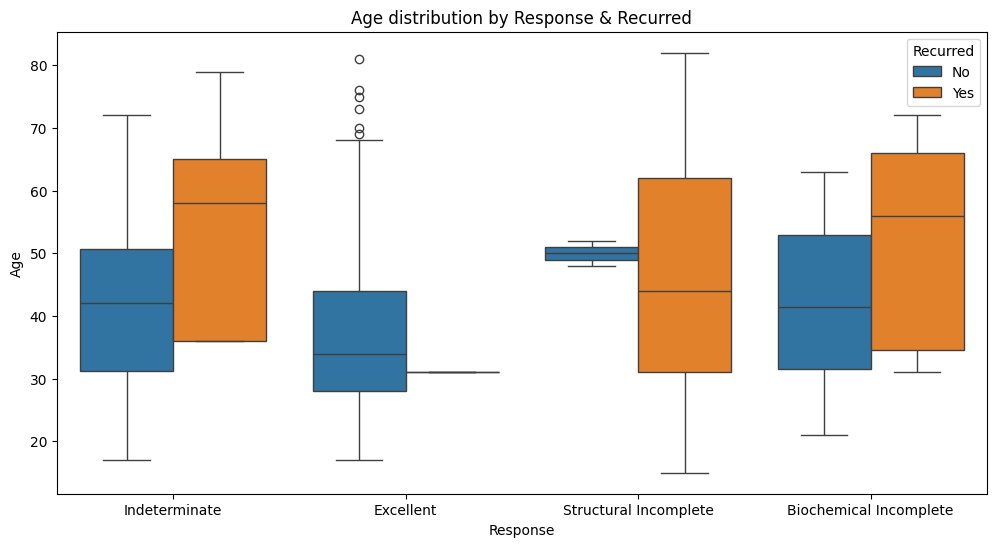

In [95]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Response', y='Age', hue='Recurred')
plt.title("Age distribution by Response & Recurred")
plt.show()

/tmp/ipython-input-1624950350.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Risk", y="Age", palette="Set3")


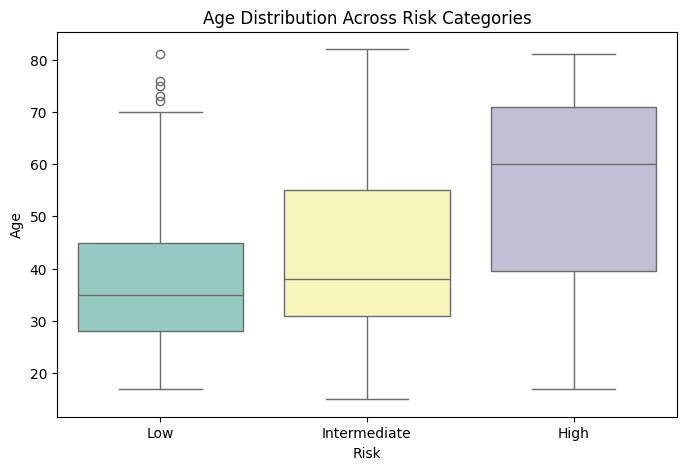

In [96]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Risk", y="Age", palette="Set3")
plt.title("Age Distribution Across Risk Categories")
plt.show()



One-Hot encoded on categorical columns

In [97]:
X = df.drop(columns=['Response','Recurred'])
y = df['Recurred'].map({'Yes':1,'No':0})

In [98]:
# Identify categorical columns
cat_col = X.select_dtypes(include=['object']).columns
# Apply one-hot encoding to categorical columns
X = pd.get_dummies(X, columns=cat_col, drop_first=True)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [100]:
model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42, class_weight='balanced')

In [101]:
model.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=200,
                       random_state=42)

In [102]:
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93        58
           1       0.82      0.74      0.78        19

    accuracy                           0.90        77
   macro avg       0.87      0.84      0.85        77
weighted avg       0.89      0.90      0.89        77



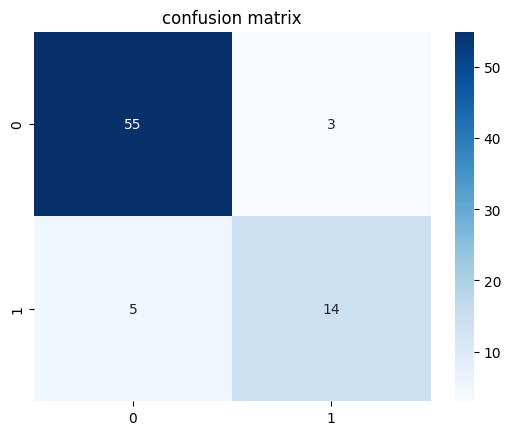

In [103]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt='d', cmap='Blues')
plt.title("confusion matrix")
plt.show()

In [104]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced']
}

In [105]:
grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)

In [106]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [107]:
print("Best params:", grid.best_params_)

Best params: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_split': 5, 'n_estimators': 300}


In [108]:
best_model = grid.best_estimator_

In [109]:
y_pred = best_model.predict(X_test)

In [110]:
cm = confusion_matrix(y_test, y_pred)

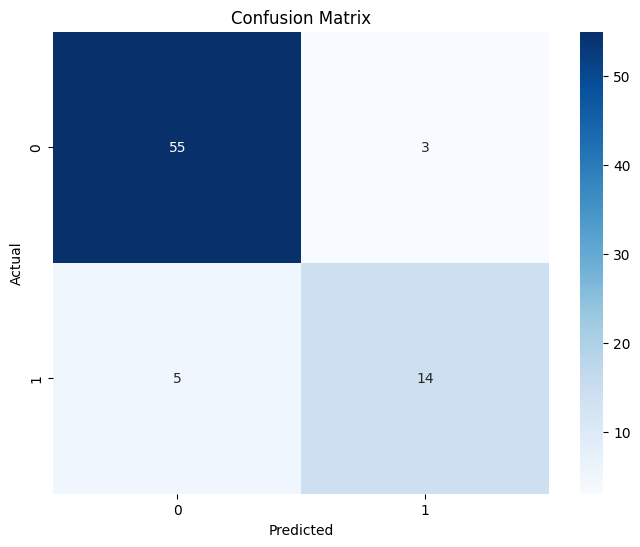

In [111]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [112]:
print(y.value_counts())

Recurred
0    275
1    108
Name: count, dtype: int64


In [113]:
smote = SMOTE(random_state=42)

In [114]:
X_resampled, y_resampled = smote.fit_resample(X, y)

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [116]:
y_prob = best_model.predict_proba(X_test)[:, 1]

In [117]:
print("ROC_AUC:",roc_auc_score(y_test, y_prob))

ROC_AUC: 0.982884679295447


In [118]:
y_pred = best_model.predict(X_test)

In [119]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        59
           1       0.94      0.96      0.95        51

    accuracy                           0.95       110
   macro avg       0.95      0.95      0.95       110
weighted avg       0.95      0.95      0.95       110

